# Sloping Text
### Equal aspect plots only

This is an example of sloped text following a curve, when you have the equation for that curve.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

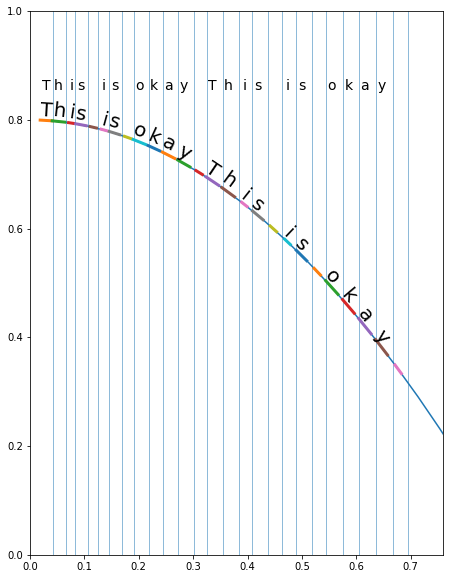

In [12]:
x = np.linspace(0.03,2)
f = lambda x: .8 - x**2 
y = f(x)
x0, y0 = x[0], y[0] 

fig, ax = plt.subplots(figsize = (10,10))
l,  = ax.plot(x,y)

ax.set_aspect(1)
ax.set_xlim(-0,1)
ax.set_ylim(-0,1)
fig.canvas.draw()

transform = ax.transAxes # use axes coords

pad = 10**-2
for char in 'This is okay '*2:
    
    t = ax.text(x0, y0, char, va = 'bottom', ha = 'center', size = 20)    
    t2 = ax.text(x0, y[0]+.051, char, va = 'bottom', ha = 'center', size = 14)


    window = t.get_tightbbox(plt.gcf().canvas.get_renderer())\
                   .transformed(ax.transAxes.inverted()) #get_window_extent()
    
    ax.plot([window.x0,window.x1], [f(window.x0), f(window.x1)], linewidth = 3)
    
    window_slope = (f(window.x1) - f(window.x0)) /(window.x1-window.x0)    
    t.set_rotation(math.degrees(math.atan(window_slope)))
    
    # get new window after rotation
    window = t.get_window_extent()\
                   .transformed(transform.inverted())
    
    # update coords for next letter
    x0 = window.x1 + pad   
    plt.axvline(window.x1, linewidth = 0.5)
    y0 = f(x0)

    
ax.set_xlim(-0,.76)
ax.set_ylim(0,1)
plt.show()